In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

### Data Loading

In [0]:
df = pd.read_csv("nba.csv")
df = df[["age","player_height","player_weight","pts","reb"]]
df.columns =["age","height","weight","pts","reb"]


In [7]:
df.tail(5)

,age,height,weight,pts,reb
11140,28.0,208.28,108.862080,9.1,5.4
11141,23.0,195.58,97.522280,1.2,0.3
11142,28.0,213.36,117.933920,6.1,5.1
11143,27.0,208.28,104.779752,2.1,3.0
11144,25.0,193.04,86.182480,4.5,1.4


In [0]:
def outlier(column):
  mean = df[column].mean() 
  std = df[column].std()
  df[column + " Out"]=df[column].apply(lambda x: 1 if (x > mean+3*std) or (x < mean-3*std) else 0)

In [0]:
for i in df.columns:
  outlier(i)

In [0]:
def hitung(kolom):
  out = len(df[df[kolom] == 1])
  return print(kolom, f": {out}")

In [11]:
kol = ["age Out","height Out","weight Out","pts Out","reb Out"]
for i in kol:
  hitung(i)

age Out : 14
height Out : 38
weight Out : 48
pts Out : 114
reb Out : 155


In [0]:
def tampil(kolom):
  print(kolom)
  return print(df[df[kolom] == 1][kolom.replace(" Out","")])

In [13]:
for i in kol:
  tampil(i)
  print("============================")

age Out
270      43.0
730      41.0
1289     41.0
2824     41.0
3144     41.0
3575     42.0
4473     41.0
4820     44.0
4937     42.0
5365     43.0
9839     41.0
10320    41.0
10435    42.0
10960    43.0
Name: age, dtype: float64
height Out
92      231.14
242     228.60
401     160.02
483     160.02
641     167.64
647     228.60
1053    228.60
1123    160.02
1212    231.14
1248    165.10
1326    165.10
1408    231.14
1558    228.60
1705    160.02
1784    165.10
2020    160.02
2186    228.60
2415    228.60
2590    165.10
2638    228.60
2805    165.10
3211    228.60
3266    228.60
3462    165.10
3662    228.60
3715    228.60
3923    165.10
4122    228.60
4427    165.10
4484    165.10
4741    228.60
4888    165.10
5254    228.60
5700    228.60
5925    165.10
6449    165.10
6582    228.60
6692    165.10
Name: height, dtype: float64
weight Out
331      155.582056
406      140.613520
469      147.417400
480      147.417400
641       60.327736
650      142.881480
1059     142.881480
1161     

In [0]:
kriteria = []
for i in range(len(df.index)):
  if df.iloc[i]["age"] <= 25 and df.iloc[i]["height"] >= 180 and df.iloc[i]["weight"] <= 90 and df.iloc[i]["pts"] >= 6 and df.iloc[i]["reb"] >= 3:
    kriteria.append(1)
  else:
    kriteria.append(0)
df["target"] = kriteria

In [15]:
df.apply(
    lambda x:
    1 if (x["age"]<25) & (x["height"]>=180) & (x["weight"]<=90) & (x["pts"]>=6) & (x["reb"]>=3)  else 0,
    axis = 1 
    )

0        0
1        0
2        0
3        0
4        0
        ..
11140    0
11141    0
11142    0
11143    0
11144    0
Length: 11145, dtype: int64

In [16]:
df["target"].value_counts() # data imbalanced

0    10910
1      235
Name: target, dtype: int64

In [0]:
X = df[["age","height","weight","pts","reb"]]
y = df["target"]

### Handling Imbalance Dataset

In [18]:
from imblearn.under_sampling import NearMiss

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [19]:
nm = NearMiss()
X_us,y_us = nm.fit_sample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Feature Scalling - Standarisasi

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
kolom = ["age","height","weight","pts","reb"]
Xstd = pd.DataFrame(scaler.fit_transform(X_us),columns=kolom)

### Spliting Data

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test = train_test_split(Xstd,y_us,test_size=0.18)

### Fitting Model

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_roc_curve

lr = LogisticRegression()
rf = RandomForestClassifier()
dc = DecisionTreeClassifier()

In [25]:
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
dc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

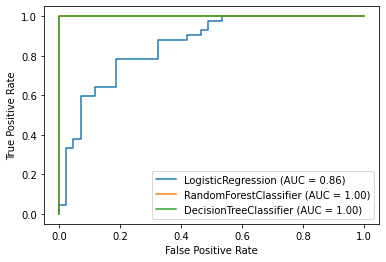

In [26]:
disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dc,x_test,y_test,ax=disp.ax_)

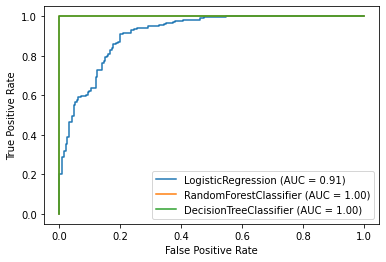

In [27]:
disp = plot_roc_curve(lr,x_train,y_train)
plot_roc_curve(rf,x_train,y_train,ax=disp.ax_)
plot_roc_curve(dc,x_train,y_train,ax=disp.ax_)

In [0]:
from sklearn.metrics import plot_confusion_matrix

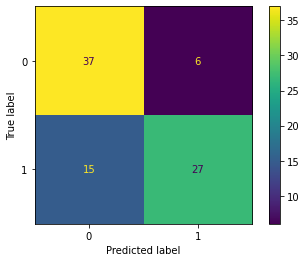

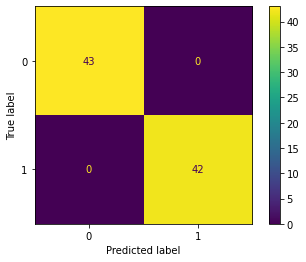

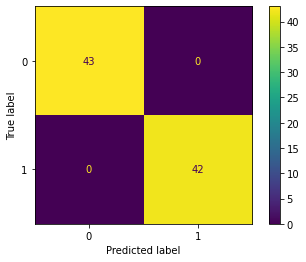

In [29]:
plot_confusion_matrix(lr,x_test,y_test)
plot_confusion_matrix(rf,x_test,y_test)
plot_confusion_matrix(dc,x_test,y_test)

## Predict

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
dfPred = pd.read_csv("data basket.csv")
x_Pred = dfPred[["Age","Height","Weight","Avg Points","Avg Rebounds"]]
x_PStd = scaler.fit_transform(x_Pred)

In [32]:
print(rf.predict(x_PStd))
print(dc.predict(x_PStd))
print(lr.predict(x_PStd))

[1 0 0 0 0 1 0 0 1 1]
[1 0 0 0 0 1 0 0 1 1]
[0 0 0 0 1 1 0 0 1 0]


In [0]:
dfPred["rekrut"] = rf.predict(x_PStd)
dfPred["rekrut"]=dfPred["rekrut"].apply(lambda x: "Tolak" if x == 0 else "Rekrut")

In [34]:
dfPred

,Name,Club,Country,Age,Height,Weight,Avg Points,Avg Rebounds,rekrut
0,Andakara Prastawa Dyaksa,Pelita Jaya Bakrie,Indonesia,24,190,90,7,6,Rekrut
1,Reggie Mononimbar,Pelita Jaya Bakrie,Indonesia,21,185,86,6,3,Tolak
2,Hardianus Lakudu,Satria Muda Pertamina Jakarta,Indonesia,23,178,83,10,3,Tolak
3,Kevin Yonas Sitorus,Satria Muda Pertamina Jakarta,Indonesia,26,185,75,11,4,Tolak
4,Arki Dikania Wisnu,Satria Muda Pertamina Jakarta,Indonesia,20,183,80,5,2,Tolak
5,Laurentius Steven Oei,Satria Muda Pertamina Jakarta,Indonesia,21,191,85,4,10,Rekrut
6,Mei Joni,Stapac,Indonesia,25,188,90,7,5,Tolak
7,Vincent Rivaldi Kosasih,Stapac,Indonesia,23,179,87,1,2,Tolak
8,Hardian Wicaksono,Pacific Caesar Surabaya,Indonesia,21,177,80,9,8,Rekrut
9,Brandon Jawato,Louvre Surabaya,Indonesia,24,182,85,6,5,Rekrut
